# Trabajo de investigación nro 3
1. Jean Pierre Tinco Bellido.
   
### 1. Desarrollo de modelos
Habilidades a desarrollar:
* Modelo supervisado (8 ptos)
Dataset 1: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database (500 vs 260)
  1. Undersampling y oversampling. Tomek Links, Scut, Smote.
  2. Clasificadores de Bayes
  3. Comparación de modelos de clasificación.
  4. Árboles de decisión 
     1. Iterative Dichotomizer 3
* Modelo no supervisado (5 ptos) https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data
  1. Clusterización a través de KMeans. Desarrollar el procedimiento para elegir un K.
  
### 2. Lectura (congreso)
Elegir el 1 o el 2
1. Congreso (hasta 4ptos) [opcional]
2. The Digitalist Papers. Un conjunto de 12 ensayos que presentan los posibles futuros que la revolución de la IA puede producir. (4 puntos)
   1. [Informational GPS](https://www.digitalistpapers.com/essays/informational-gps) [2pts]
      1. Según el ensayo ¿Qué relación existe entre la tecnología Global Positioning System (GPS) y los Large Language Models (LLMs)? Menciona las similitudes y diferencias en una tabla comparativa.
   2. Según en ensayo [The Potential for AI to Restore Local Community Connectedness, The Bedrock of a Healthy Democracy](https://www.digitalistpapers.com/essays/the-potential-for-ai-to-restore-local-community-connectedness-the-bedrock-of-a-healthy-democracy) responder las siguientes preguntas [2pts]
      1. ¿Cómo la IA puede ayudar a generar mejores conexiones con nuestra sociedad? 
      2. ¿Cómo las plataformas pueden ser la base de mejores redes de soporte en la comunidad?
      3. ¿Es posible utilizar IA para evitar posibles comentarios ofensivos? En caso sea así ¿Para qué se utilizaría?

### 3. Multimedia
Las siguientes entrevistas son realizadas a personas dirigiendo las compañías que están liderando el desarrollo de IA en el mundo. 
   1. [The Future Mark Zuckerberg Is Trying To Build](https://www.youtube.com/watch?v=oX7OduG1YmI)
   2. [Google CEO Sundar Pichai and the Future of AI](https://www.youtube.com/watch?v=5puu3kN9l7c)
   3. [Inside OpenAI, the Architect of ChatGPT, featuring Mira Murati](https://www.youtube.com/watch?v=p9Q5a1Vn-Hk)   

---

## Parte 1: Desarrollo de modelos

### 1.1 Modelo supervisado [8 pts]
El dataset Pima Indians Diabetes contiene información que permite predecir si un paciente tiene o no tiene diabetes basado en las siguientes características (features) `Pregnancies`,`Glucose`,`BloodPressure`,`SkinThickness`,`Insulin`,`BMI`,`DiabetesPedigreeFunction`,`Age`,`Outcome`.
1. **Pregnancies**: Número de embarazos que ha tenido la paciente.
2. **Glucose** Concentración de glucosa plasmática a 2 horas en una prueba de tolerancia oral a la glucosa.
3. **BloodPressure** Presión arterial diastólica.
4. **SkinThickness** Grosor del pliegue cutáneo del tríceps.
5. **Insulin** Insulina sérica a 2 horas.
6. **BMI** Índice de masa corporal.
7. **DiabetesPedigreeFunction** Función que puntúa la probabilidad de diabetes basada en el historial familiar
8. **Age** Edad
9. **Outcome**: Variable objetivo/clase 
    Tipo: Binario (0 o 1)
    0 = No tiene diabetes
    1 = Tiene diabetes

#### Desarrollo

a) Luego de una lectura del dataset ¿Existe un desbalance en el dataset? En caso sea así ¿Cuál es la proporción de desbalance? [0.5 pts]

b) Identifique outliers en el dataset. En caso existan, elimínelos [0.5 pts]

c) Realice un TomekLinks undersampling [1 pts]

d) Realice un SMOte oversampling [1 pts]

e) Desarrolle un modelo de clasificación basado en LogisticRegression, SVM y BayesClassifier y Árboles de decisión. [1 pts]

f) Compare la performance de cada modelo en tres etapas. [2 pts]
    * Modelo sin balanceo de datos.
    * Modelo con undersampling.
    * Modelo con oversampling. 
    La comparación debe ser numérica (Accuracy, Precision, Recalll y F1-Score) y gráfica (Matriz de confusión, curvas ROC)

g) Puntaje según la precisión obtenida. Se pueden utilizar métodos de regularización, kernels y demás parámetros permitidos por cada modelo. 
    Acc entre 0-60 -> 0 ptos
    Acc entre 60-85 -> 1 ptos
    Acc entre 86-100 -> 1 ptos


# Modelo Supervisado

#### a) Luego de una lectura del dataset ¿Existe un desbalance en el dataset? En caso sea así ¿Cuál es la proporción de desbalance? [0.5 pts]

##### Lectura del dataset

In [72]:
import pandas as pd


dataset=pd.read_csv('diabetes.csv')

dataset.info()

dataset.isnull().sum()
dataset.isna().sum()


print("Cantidad en cada clase:",dataset['Outcome'].value_counts())


# La proporcion del desbalance es 500 en clase 0 y 268 en clase 1 lo que da un desbalance de 232


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Cantidad en cada clase: Outcome
0    500
1    268
Name: count, dtype: int64


##### Distribucion de los datos

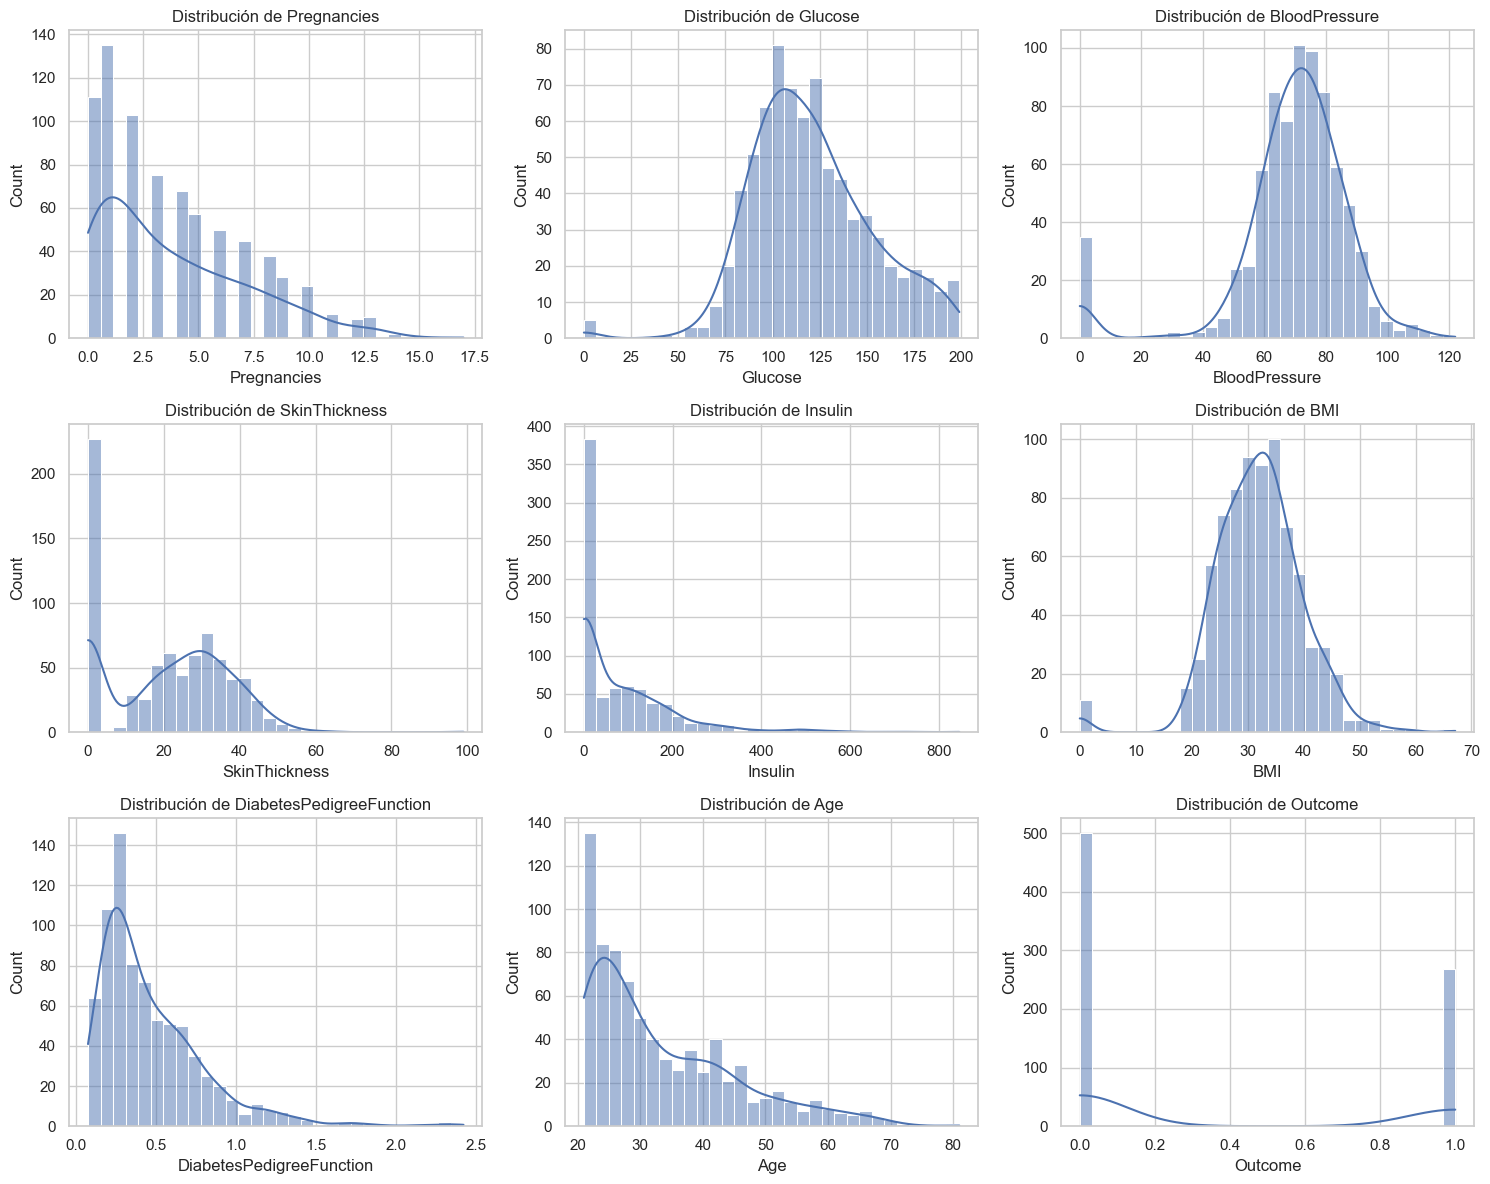

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 12))

for i, column in enumerate(dataset.columns, 1):
    plt.subplot(3, 3, i) 
    sns.histplot(dataset[column], kde=True, bins=30)
    plt.title(f'Distribución de {column}')

plt.tight_layout()
plt.show()

# Como podemos ver hay valores 0 que estan afectando la correcta distribucion de los datos en las columnas Glucose,BoodPressure
# SkinThickness,Insulin y BMI

##### Eliminado valores que tienen 0

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    float64
 2   BloodPressure             392 non-null    float64
 3   SkinThickness             392 non-null    float64
 4   Insulin                   392 non-null    float64
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
 8   Outcome                   392 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 30.6 KB


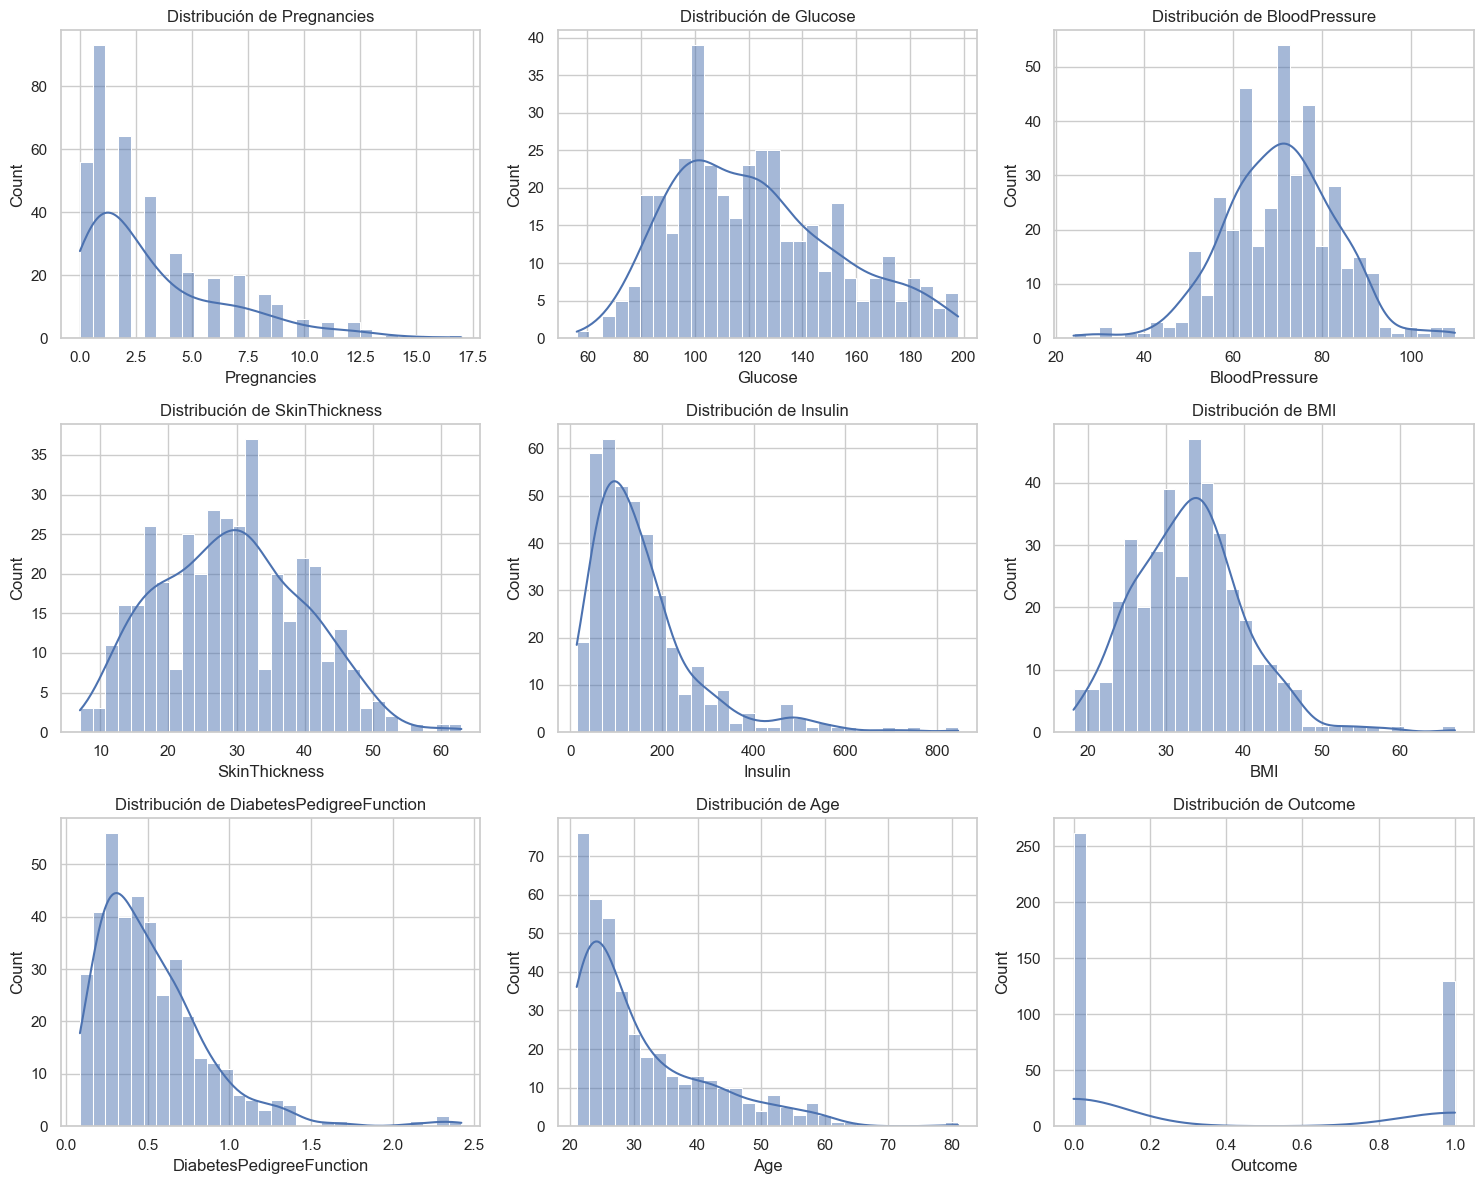

In [74]:
import numpy as np
columns_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

dataset[columns_to_clean] = dataset[columns_to_clean].replace(0, np.nan)

dataset=dataset.dropna(subset=columns_to_clean)

dataset.info()
plt.figure(figsize=(15, 12))


for i, column in enumerate(dataset.columns, 1):
    plt.subplot(3, 3, i)  
    sns.histplot(dataset[column], kde=True, bins=30)  
    plt.title(f'Distribución de {column}')

plt.tight_layout()
plt.show()

#### b) Identifique outliers en el dataset. En caso existan, elimínelos [0.5 pts]


##### Visualizacion de valores atipicos

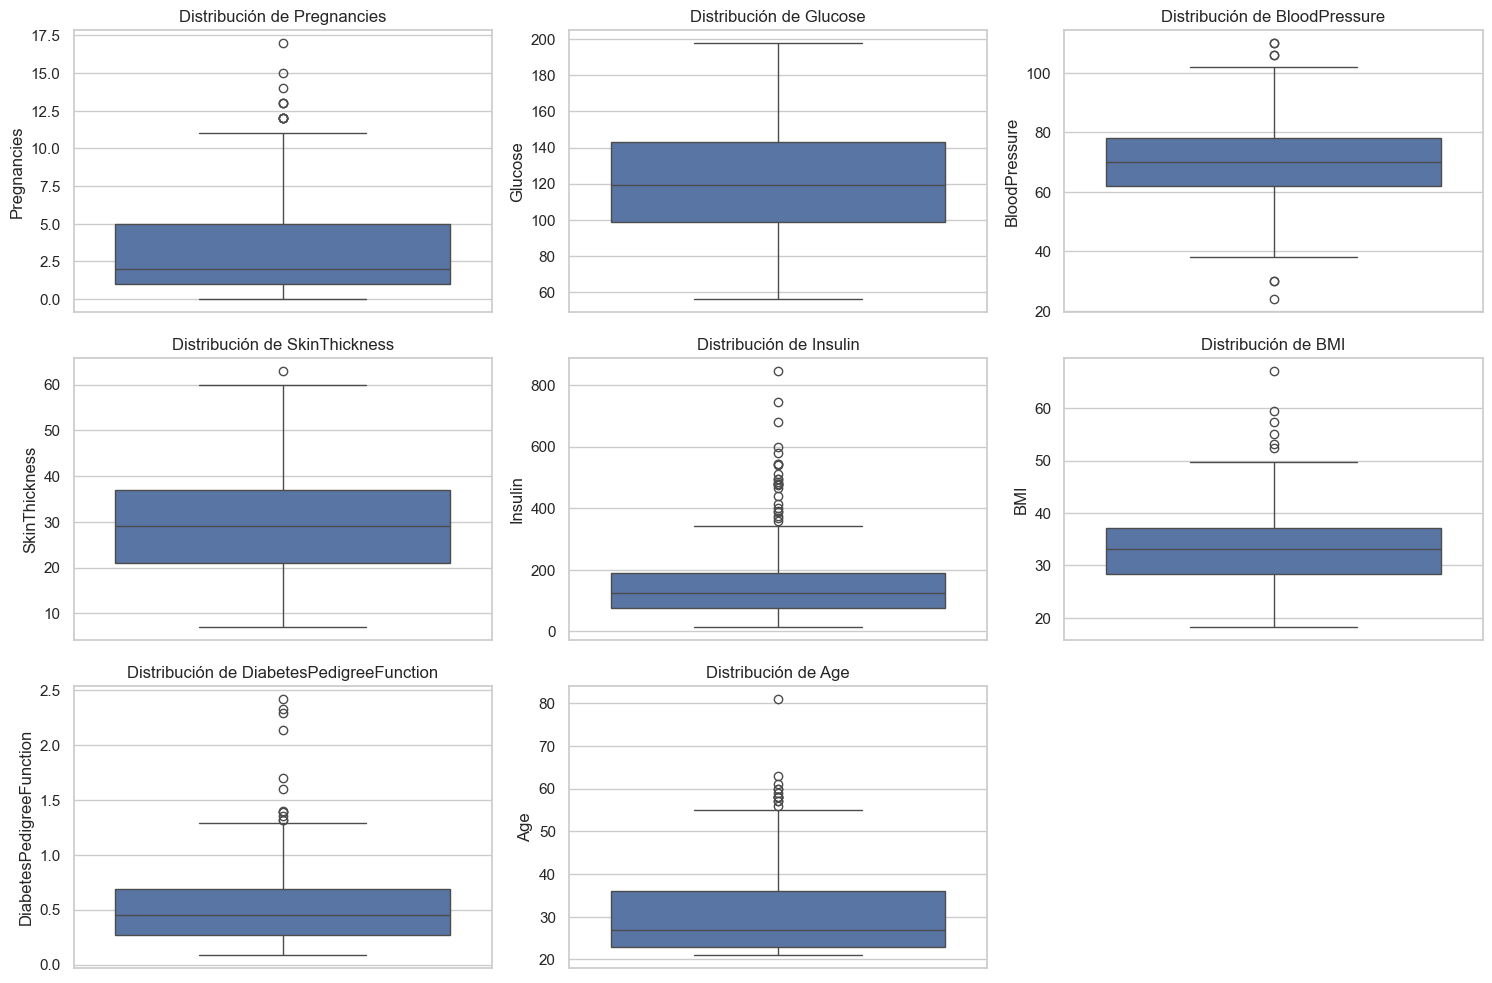

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(15,10))

for i, column in enumerate(dataset.columns[:-1], 1):
    plt.subplot(3, 3, i)  
    sns.boxplot(data=dataset, y=column)
    plt.title(f'Distribución de {column}')

plt.tight_layout()
plt.show()




##### Eliminado valores atipicos

In [76]:
dataset_clean = dataset.copy()

for column in dataset_clean.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = dataset_clean[column].quantile(0.25)  
    Q3 = dataset_clean[column].quantile(0.75)  
    IQR = Q3 - Q1  

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    dataset_clean = dataset_clean[(dataset_clean[column] >= lower_limit) & (dataset_clean[column] <= upper_limit)]

print("Tamaño original del dataset:", dataset.shape)
print("Tamaño después de eliminar valores atípicos:", dataset_clean.shape)

Tamaño original del dataset: (392, 9)
Tamaño después de eliminar valores atípicos: (321, 9)


##### Visualizacion del dataset sin valores atipicos

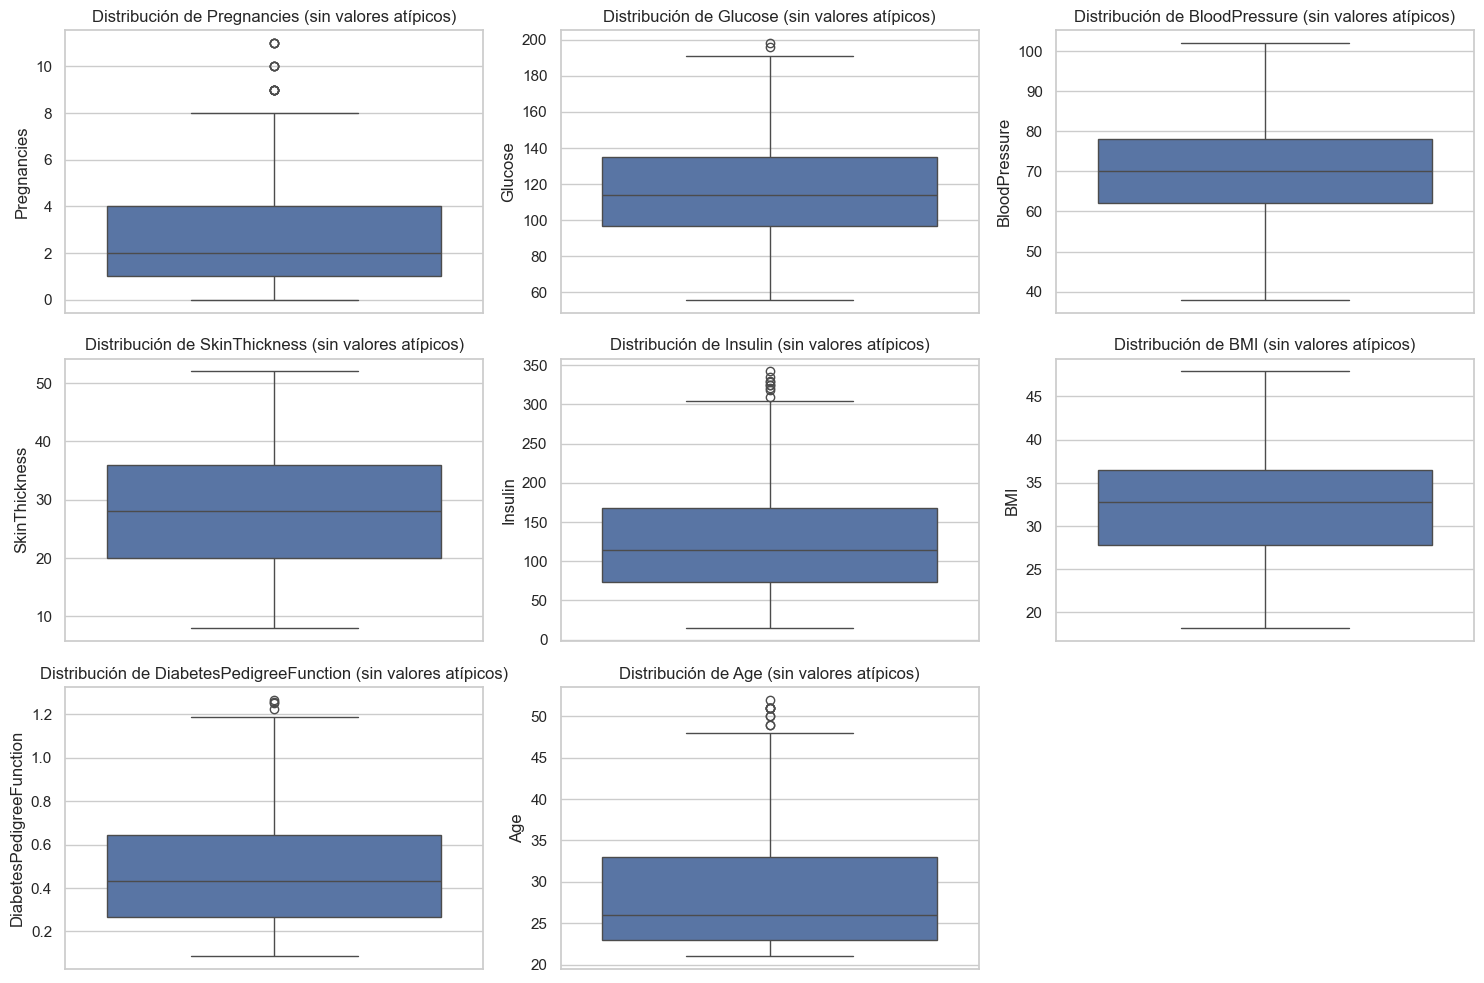

'\nNota de porque sigue habiendo algunos valores atipicos\nLa eliminación de valores atípicos modifica la distribución del dataset, lo que puede convertir algunos datos que \nantes eran normales en nuevos atípicos. Esto sucede porque, al reducir el rango intercuartílico (IQR) al eliminar datos \nextremos, los límites se ajustan, haciendo que algunos valores previamente aceptables se consideren atípicos. \nPara evitar este efecto y estabilizar la distribución, aplicamos la eliminación de valores atípicos una sola vez, \nutilizando umbrales iniciales basados en percentiles.\n\n'

In [77]:
plt.figure(figsize=(15, 10))  
for i, column in enumerate(dataset_clean.columns[:-1], 1): 
    plt.subplot(3, 3, i)  
    sns.boxplot(data=dataset_clean, y=column)
    plt.title(f'Distribución de {column} (sin valores atípicos)')

plt.tight_layout()
plt.show()

"""
Nota de porque sigue habiendo algunos valores atipicos
La eliminación de valores atípicos modifica la distribución del dataset, lo que puede convertir algunos datos que 
antes eran normales en nuevos atípicos. Esto sucede porque, al reducir el rango intercuartílico (IQR) al eliminar datos 
extremos, los límites se ajustan, haciendo que algunos valores previamente aceptables se consideren atípicos. 
Para evitar este efecto y estabilizar la distribución, aplicamos la eliminación de valores atípicos una sola vez, 
utilizando umbrales iniciales basados en percentiles.

"""



#### c) Realice un TomekLinks undersampling [1 pts]


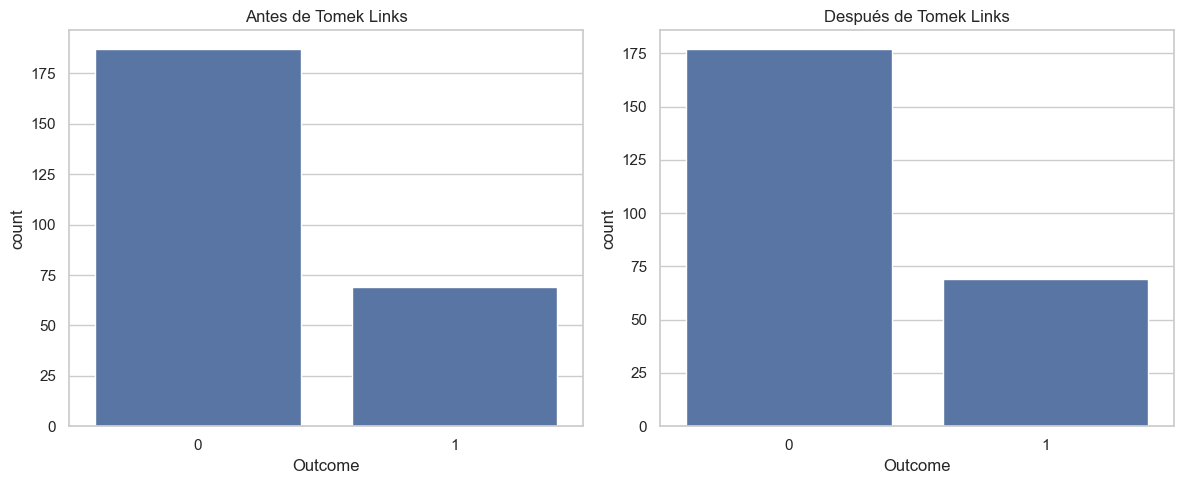

In [78]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import TomekLinks

X = dataset_clean.drop(columns=['Outcome'])
y = dataset_clean['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

tomek = TomekLinks()
X_resampled_tomek, y_resampled_tomek = tomek.fit_resample(X_train, y_train)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title('Antes de Tomek Links')
plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled_tomek)
plt.title('Después de Tomek Links')
plt.tight_layout()
plt.show()

#### d) Realice un SMOte oversampling [1 pts]


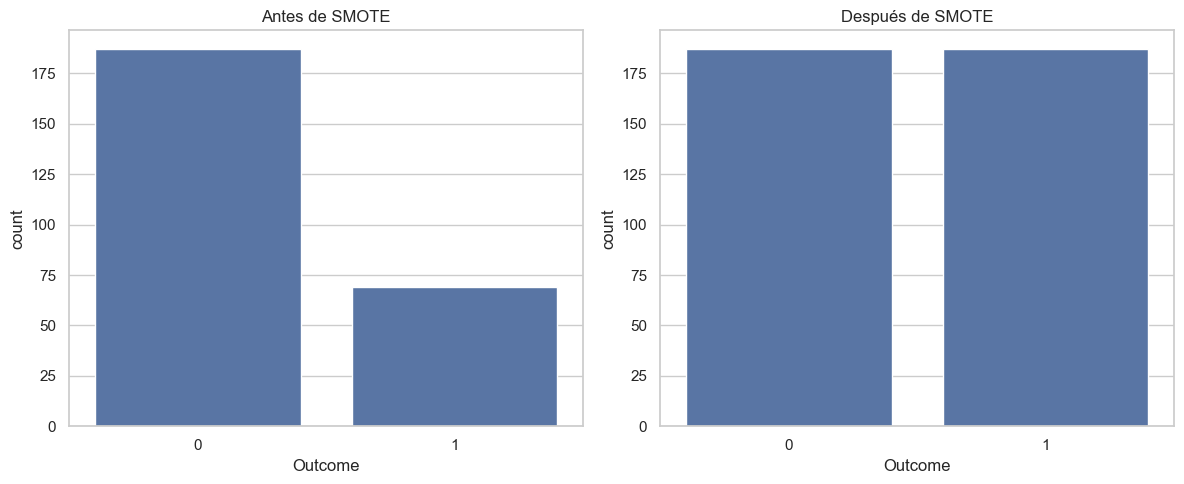

In [79]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title('Antes de SMOTE')
plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled_smote)
plt.title('Después de SMOTE')
plt.tight_layout()
plt.show()

#### e) Desarrolle un modelo de clasificación basado en LogisticRegression, SVM y BayesClassifier y Árboles de decisión. [1 pts]




In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_clean = scaler.fit_transform(X_train)
X_test_clean = scaler.transform(X_test)
X_resampled_tomek = scaler.fit_transform(X_resampled_tomek)
X_resampled_smote = scaler.fit_transform(X_resampled_smote)

models = {
    'Regresión Logística': (LogisticRegression(solver='liblinear', penalty='l2'), 
                           {'C': [0.1, 1, 10, 100]}),
    'SVM': (SVC(probability=True), 
            {'C': [1,2,3], 'kernel': ['linear', 'poly', 'rbf'], 'degree': [1, 2, 3]}),
    'Naive Bayes': (GaussianNB(), 
                    {'var_smoothing': [1e-10, 1e-9, 1e-8]}),
    'Árbol de Decisión': (DecisionTreeClassifier(), 
                          {'max_depth': [None, 2, 5, 10], 'min_samples_split': [2, 5, 10]})
}

datasets = {
    'Original': (X_train_clean, y_train, X_test_clean),
    'Tomek Links': (X_resampled_tomek, y_resampled_tomek, scaler.transform(X_test)),  
    'SMOTE': (X_resampled_smote, y_resampled_smote, scaler.transform(X_test))  
}

#### f) Compare la performance de cada modelo en tres etapas. [2 pts] Modelo sin balanceo de datos.,Modelo con undersampling y Modelo con oversampling. La comparación debe ser numérica (Accuracy, Precision, Recalll y F1-Score) y gráfica (Matriz de confusión, curvas ROC)

Entrenando modelo: Regresión Logística en dataset: Original...


C:\Users\User\AppData\Local\Temp\ipykernel_11764\149652369.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result_row], ignore_index=True)


Entrenando modelo: Regresión Logística en dataset: Tomek Links...
Entrenando modelo: Regresión Logística en dataset: SMOTE...
Entrenando modelo: SVM en dataset: Original...
Entrenando modelo: SVM en dataset: Tomek Links...
Entrenando modelo: SVM en dataset: SMOTE...
Entrenando modelo: Naive Bayes en dataset: Original...
Entrenando modelo: Naive Bayes en dataset: Tomek Links...
Entrenando modelo: Naive Bayes en dataset: SMOTE...
Entrenando modelo: Árbol de Decisión en dataset: Original...
Entrenando modelo: Árbol de Decisión en dataset: Tomek Links...
Entrenando modelo: Árbol de Decisión en dataset: SMOTE...


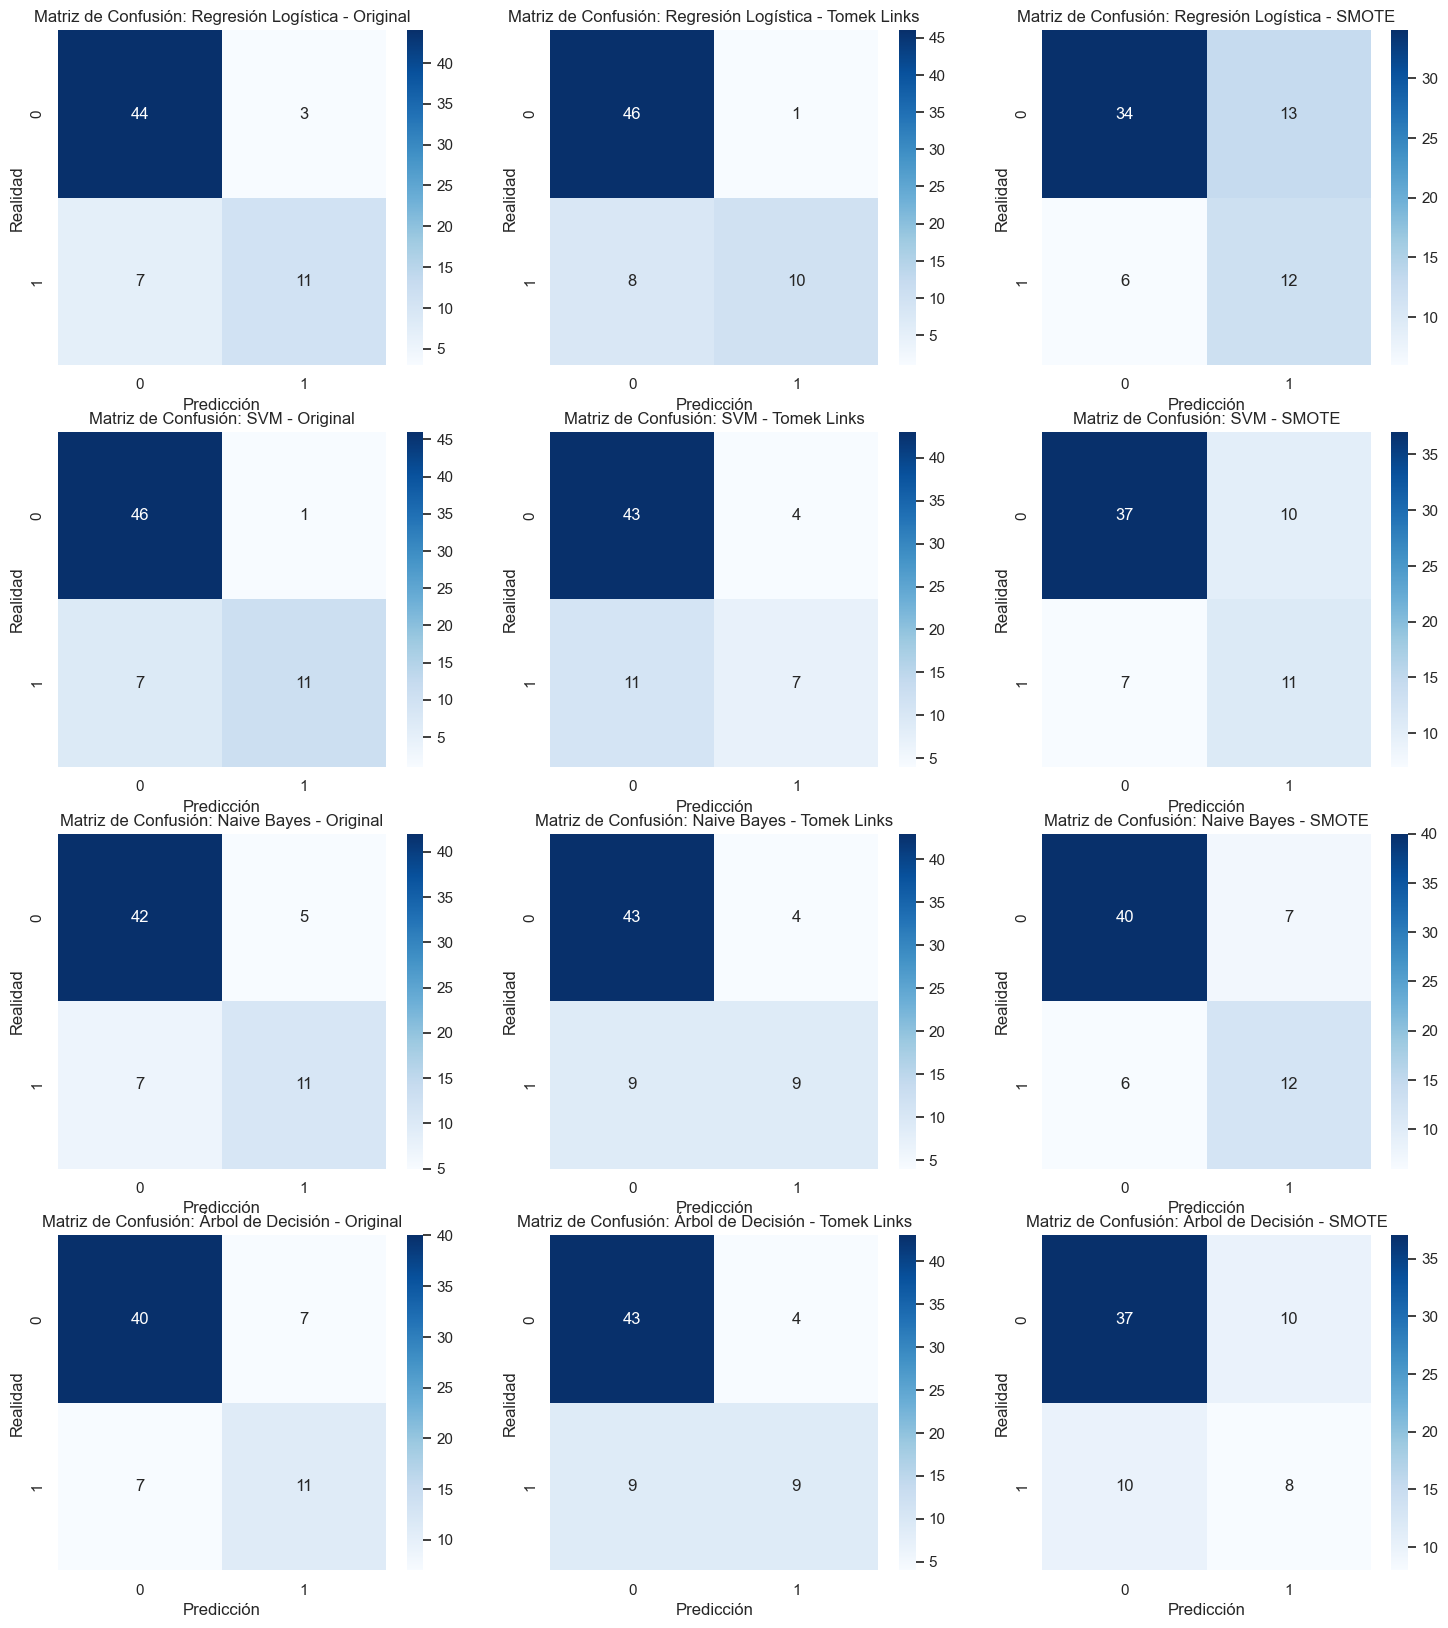

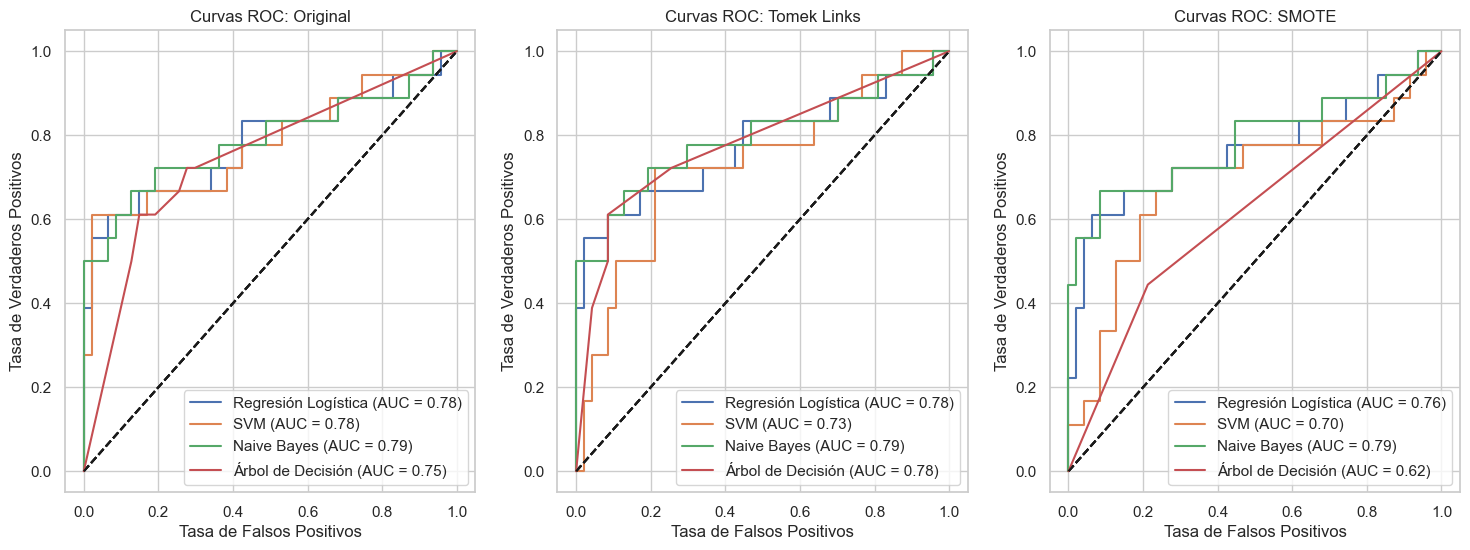

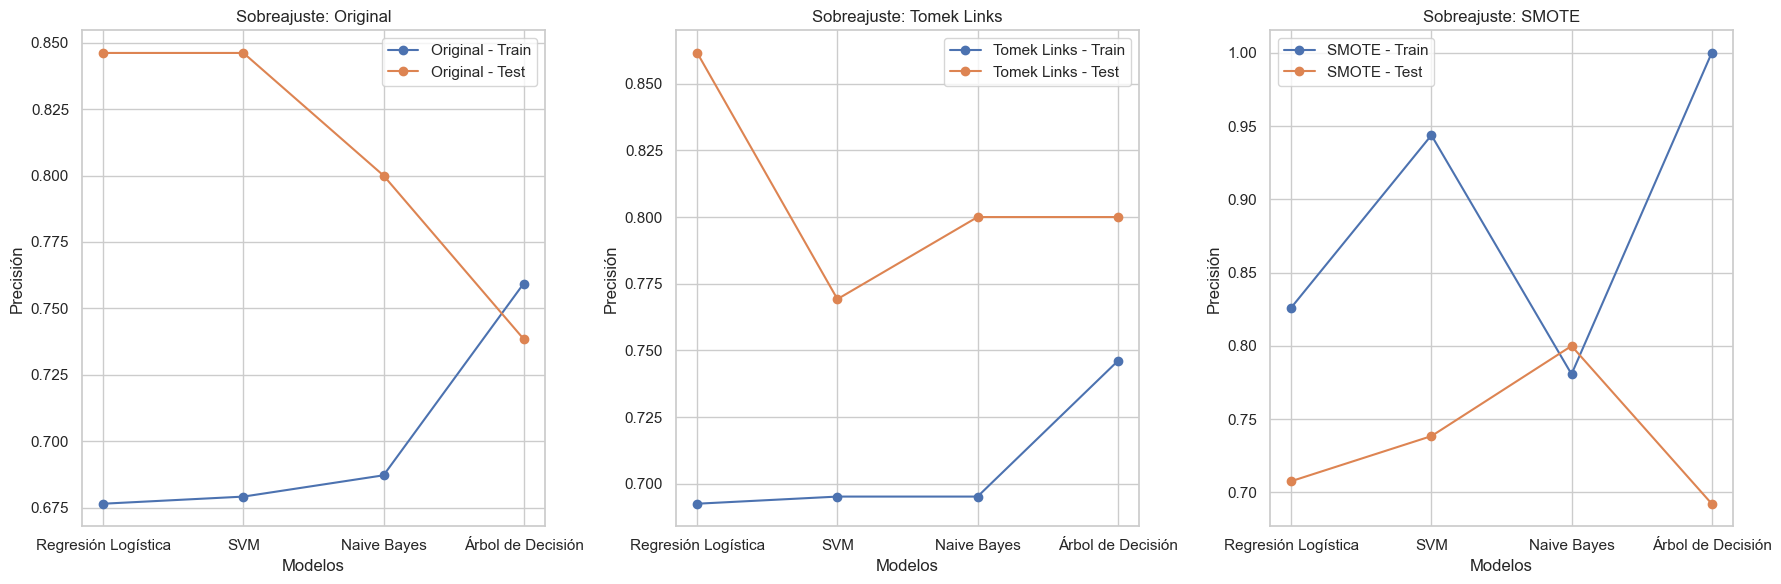


Resultados de los modelos:
                 Modelo      Dataset  Accuracy  Precision    Recall  F1-Score
0   Regresión Logística     Original  0.846154   0.785714  0.611111  0.687500
1   Regresión Logística  Tomek Links  0.861538   0.909091  0.555556  0.689655
2   Regresión Logística        SMOTE  0.707692   0.480000  0.666667  0.558140
3                   SVM     Original  0.876923   0.916667  0.611111  0.733333
4                   SVM  Tomek Links  0.769231   0.636364  0.388889  0.482759
5                   SVM        SMOTE  0.738462   0.523810  0.611111  0.564103
6           Naive Bayes     Original  0.815385   0.687500  0.611111  0.647059
7           Naive Bayes  Tomek Links  0.800000   0.692308  0.500000  0.580645
8           Naive Bayes        SMOTE  0.800000   0.631579  0.666667  0.648649
9     Árbol de Decisión     Original  0.784615   0.611111  0.611111  0.611111
10    Árbol de Decisión  Tomek Links  0.800000   0.692308  0.500000  0.580645
11    Árbol de Decisión        SMOTE

In [81]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import GridSearchCV

results = pd.DataFrame(columns=['Modelo', 'Dataset', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
fig, axes = plt.subplots(len(models), len(datasets), figsize=(18, 20))
fig_roc, ax_roc = plt.subplots(1, len(datasets), figsize=(18, 6))
fig_overfit, ax_overfit = plt.subplots(1, len(datasets), figsize=(18, 6))

best_models = {}

for model_name, (model, params) in models.items():
    for dataset_name, (X_train_set, y_train_set, X_test_scaled) in datasets.items():
        
        print(f"Entrenando modelo: {model_name} en dataset: {dataset_name}...")

        grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train_set, y_train_set)

        best_model = grid_search.best_estimator_
        best_models[(model_name, dataset_name)] = best_model  
        
        y_pred_train = best_model.predict(X_train_set)
        y_pred_test = best_model.predict(X_test_scaled)

        y_prob_test = best_model.predict_proba(X_test_scaled)[:, 1] if hasattr(best_model, 'predict_proba') else None

        accuracy_train = accuracy_score(y_train_set, y_pred_train)
        accuracy_test = accuracy_score(y_test, y_pred_test)
        accuracy = accuracy_test
        precision = classification_report(y_test, y_pred_test, output_dict=True)['1']['precision']
        recall = classification_report(y_test, y_pred_test, output_dict=True)['1']['recall']
        f1 = classification_report(y_test, y_pred_test, output_dict=True)['1']['f1-score']

        result_row = pd.DataFrame({
            'Modelo': [model_name],
            'Dataset': [dataset_name],
            'Accuracy': [accuracy],
            'Precision': [precision],
            'Recall': [recall],
            'F1-Score': [f1]
        })
        results = pd.concat([results, result_row], ignore_index=True)

        conf_matrix = confusion_matrix(y_test, y_pred_test)
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[list(models.keys()).index(model_name), list(datasets.keys()).index(dataset_name)])
        axes[list(models.keys()).index(model_name), list(datasets.keys()).index(dataset_name)].set_title(f'Matriz de Confusión: {model_name} - {dataset_name}')
        axes[list(models.keys()).index(model_name), list(datasets.keys()).index(dataset_name)].set_xlabel('Predicción')
        axes[list(models.keys()).index(model_name), list(datasets.keys()).index(dataset_name)].set_ylabel('Realidad')

        if y_prob_test is not None:
            fpr, tpr, _ = roc_curve(y_test, y_prob_test)
            auc = roc_auc_score(y_test, y_prob_test)
            ax_roc[list(datasets.keys()).index(dataset_name)].plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
            ax_roc[list(datasets.keys()).index(dataset_name)].plot([0, 1], [0, 1], 'k--')
            ax_roc[list(datasets.keys()).index(dataset_name)].set_title(f'Curvas ROC: {dataset_name}')
            ax_roc[list(datasets.keys()).index(dataset_name)].set_xlabel('Tasa de Falsos Positivos')
            ax_roc[list(datasets.keys()).index(dataset_name)].set_ylabel('Tasa de Verdaderos Positivos')
            ax_roc[list(datasets.keys()).index(dataset_name)].legend(loc='lower right')

for dataset_name in datasets.keys():
    dataset_results = results[results['Dataset'] == dataset_name]

    if not dataset_results.empty:
        model_names = list(models.keys())

        train_accuracies = [accuracy_score(y_train_set, best_models[(model_name, dataset_name)].predict(X_train_set)) for model_name in model_names]
        test_accuracies = [accuracy_score(y_test, best_models[(model_name, dataset_name)].predict(X_test_scaled)) for model_name in model_names]

        ax_overfit[list(datasets.keys()).index(dataset_name)].plot(
            model_names, train_accuracies,
            label=f'{dataset_name} - Train', marker='o'
        )
        ax_overfit[list(datasets.keys()).index(dataset_name)].plot(
            model_names, test_accuracies,
            label=f'{dataset_name} - Test', marker='o'
        )
        ax_overfit[list(datasets.keys()).index(dataset_name)].set_title(f'Sobreajuste: {dataset_name}')
        ax_overfit[list(datasets.keys()).index(dataset_name)].set_xlabel('Modelos')
        ax_overfit[list(datasets.keys()).index(dataset_name)].set_ylabel('Precisión')
        ax_overfit[list(datasets.keys()).index(dataset_name)].legend()

plt.tight_layout()
plt.show()

fig_roc.tight_layout()
plt.show()

fig_overfit.tight_layout()
plt.show()

print("\nResultados de los modelos:")
print(results)



# Modelo no supervisado

#### Realizar una clusterización con KMeans. ¿Cuál es el mejor K para esta clusterización? ¿Por qué? 3ptos

##### Lectura del dataset

In [82]:
import pandas as pd


df=pd.read_csv('marketing_campaign.csv',sep='\t')

df = df.drop(columns=['ID'])

df=df.dropna()


columns_to_drop = [
    'Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2',
    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 
    'Complain', 'Z_CostContact', 'Z_Revenue', 'Response','Marital_Status','Education','Dt_Customer'
]
df = df.drop(columns=columns_to_drop)

df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2216 non-null   int64  
 1   Income               2216 non-null   float64
 2   Recency              2216 non-null   int64  
 3   MntWines             2216 non-null   int64  
 4   MntFruits            2216 non-null   int64  
 5   MntMeatProducts      2216 non-null   int64  
 6   MntFishProducts      2216 non-null   int64  
 7   MntSweetProducts     2216 non-null   int64  
 8   MntGoldProds         2216 non-null   int64  
 9   NumDealsPurchases    2216 non-null   int64  
 10  NumWebPurchases      2216 non-null   int64  
 11  NumCatalogPurchases  2216 non-null   int64  
 12  NumStorePurchases    2216 non-null   int64  
 13  NumWebVisitsMonth    2216 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 259.7 KB


##### Distribuciones y relaciones del dataset

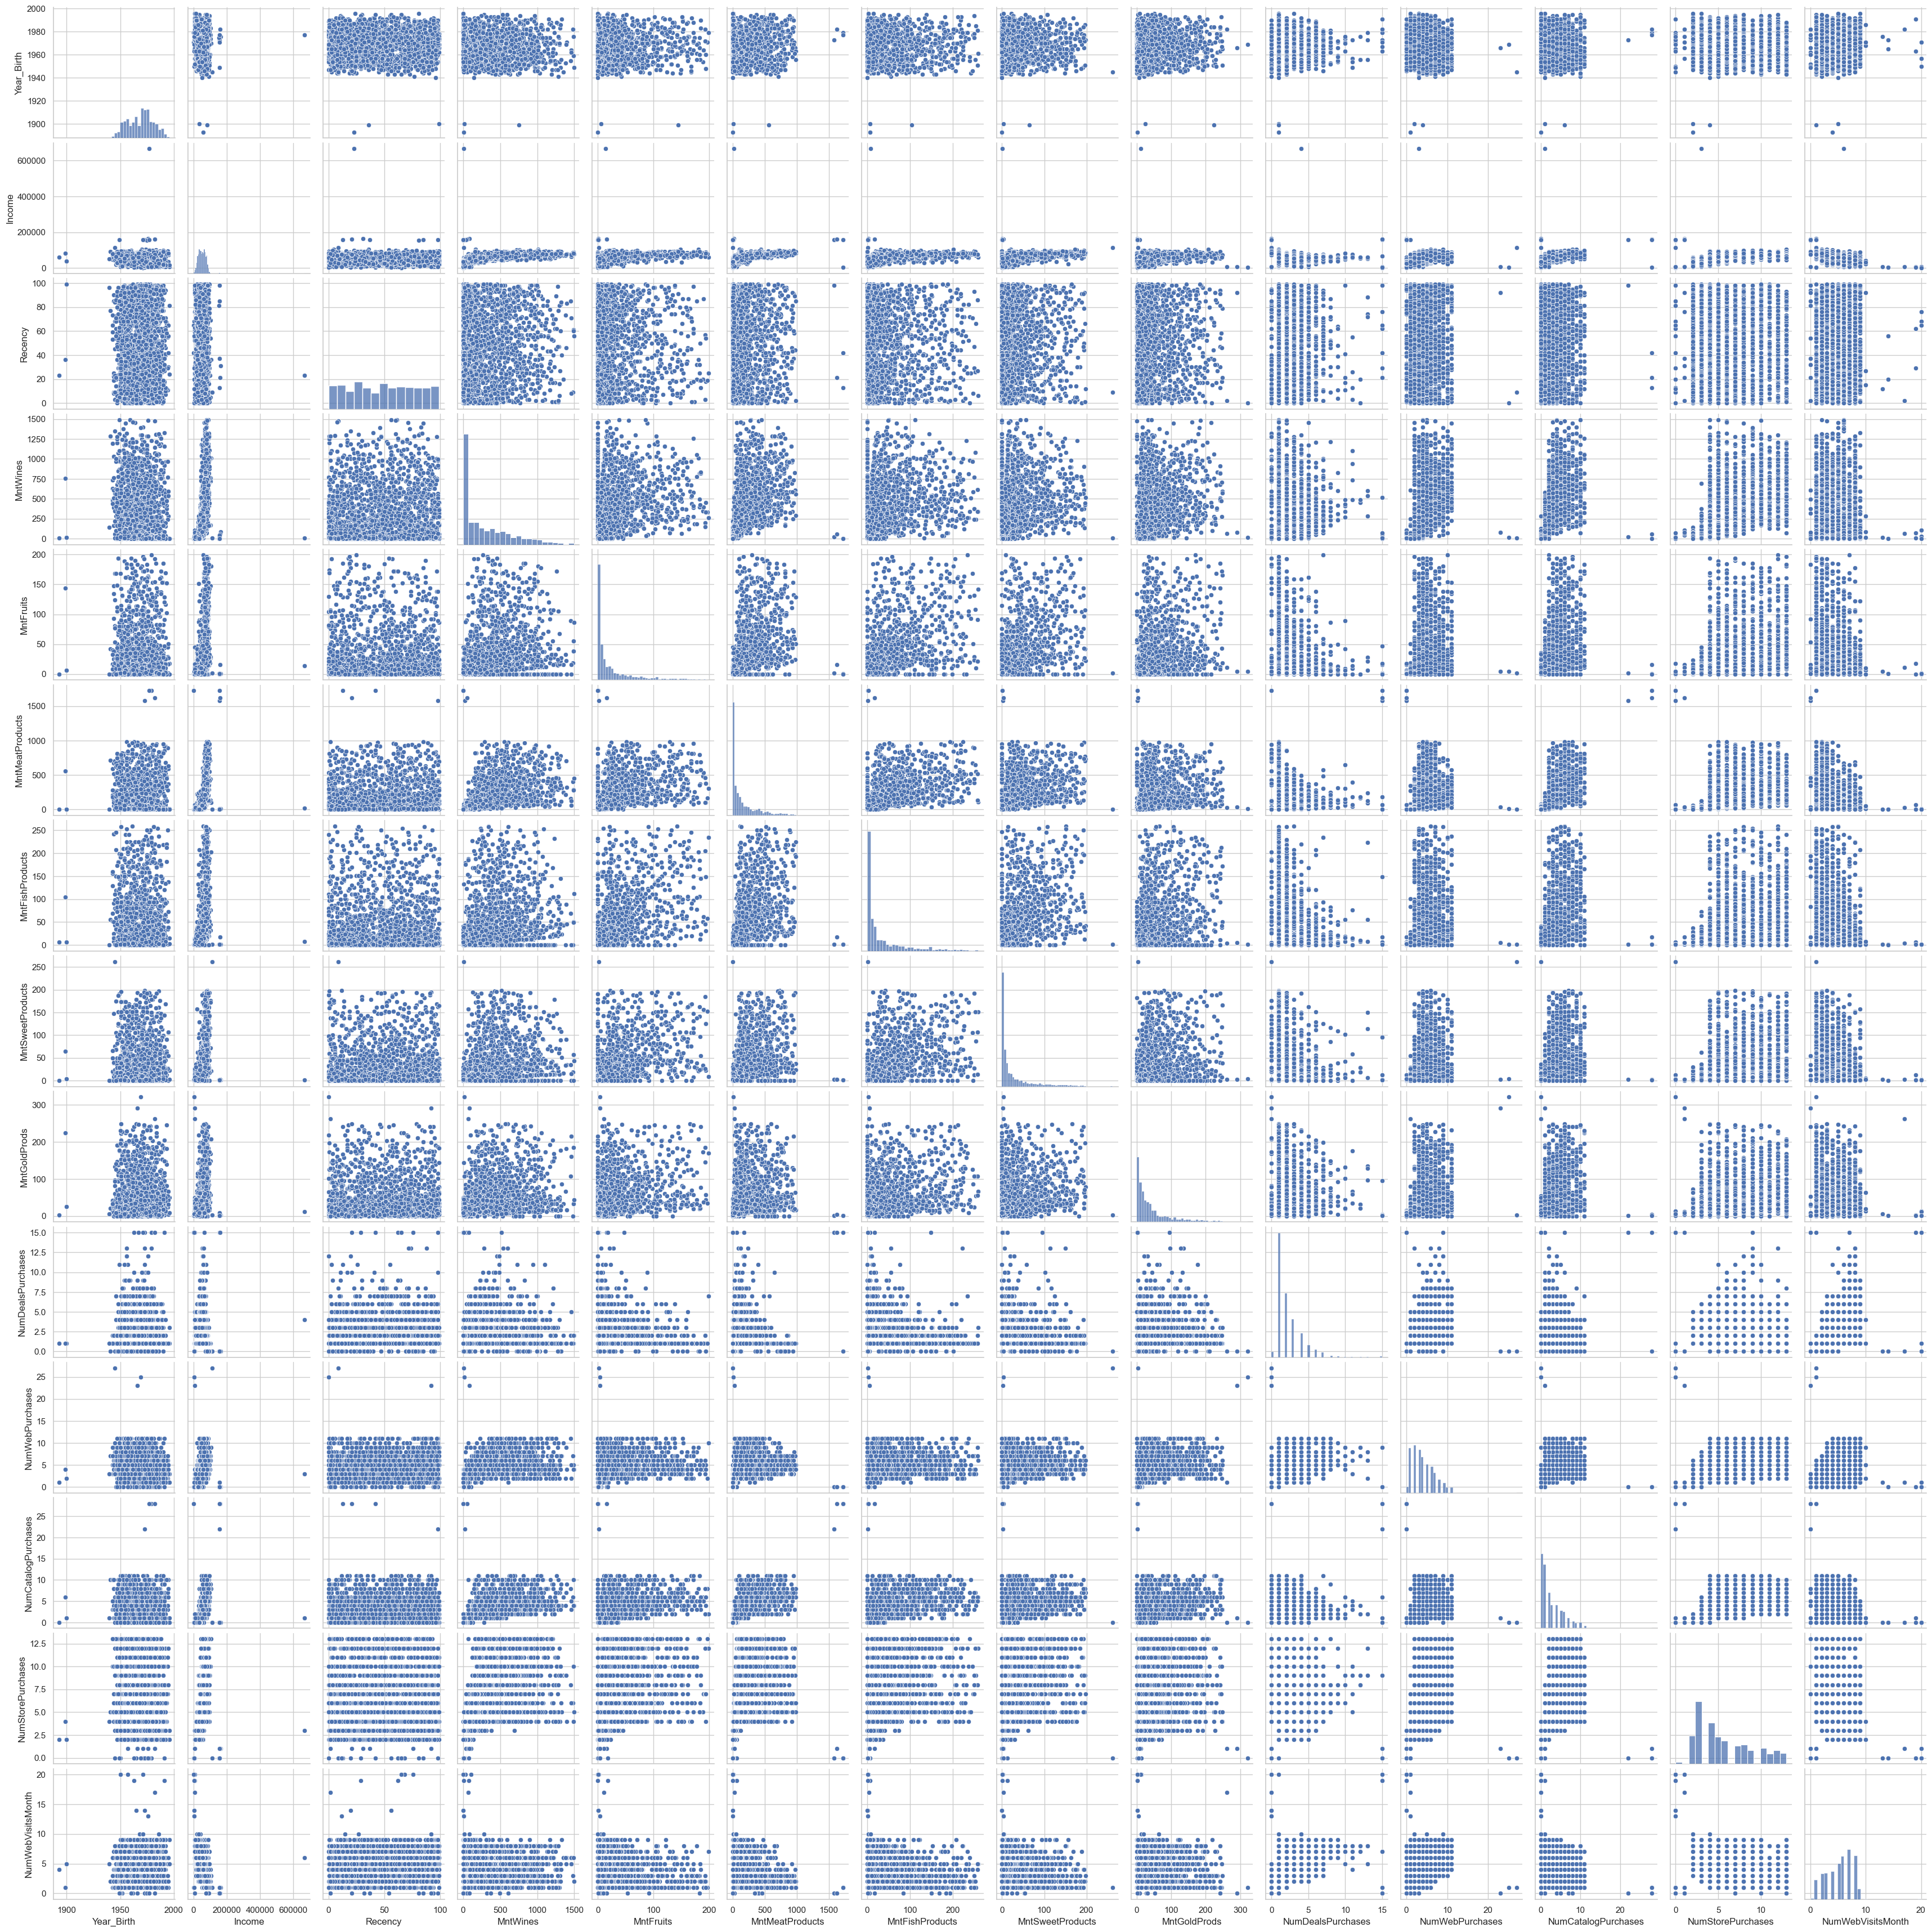

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()



##### Visualizando outliers

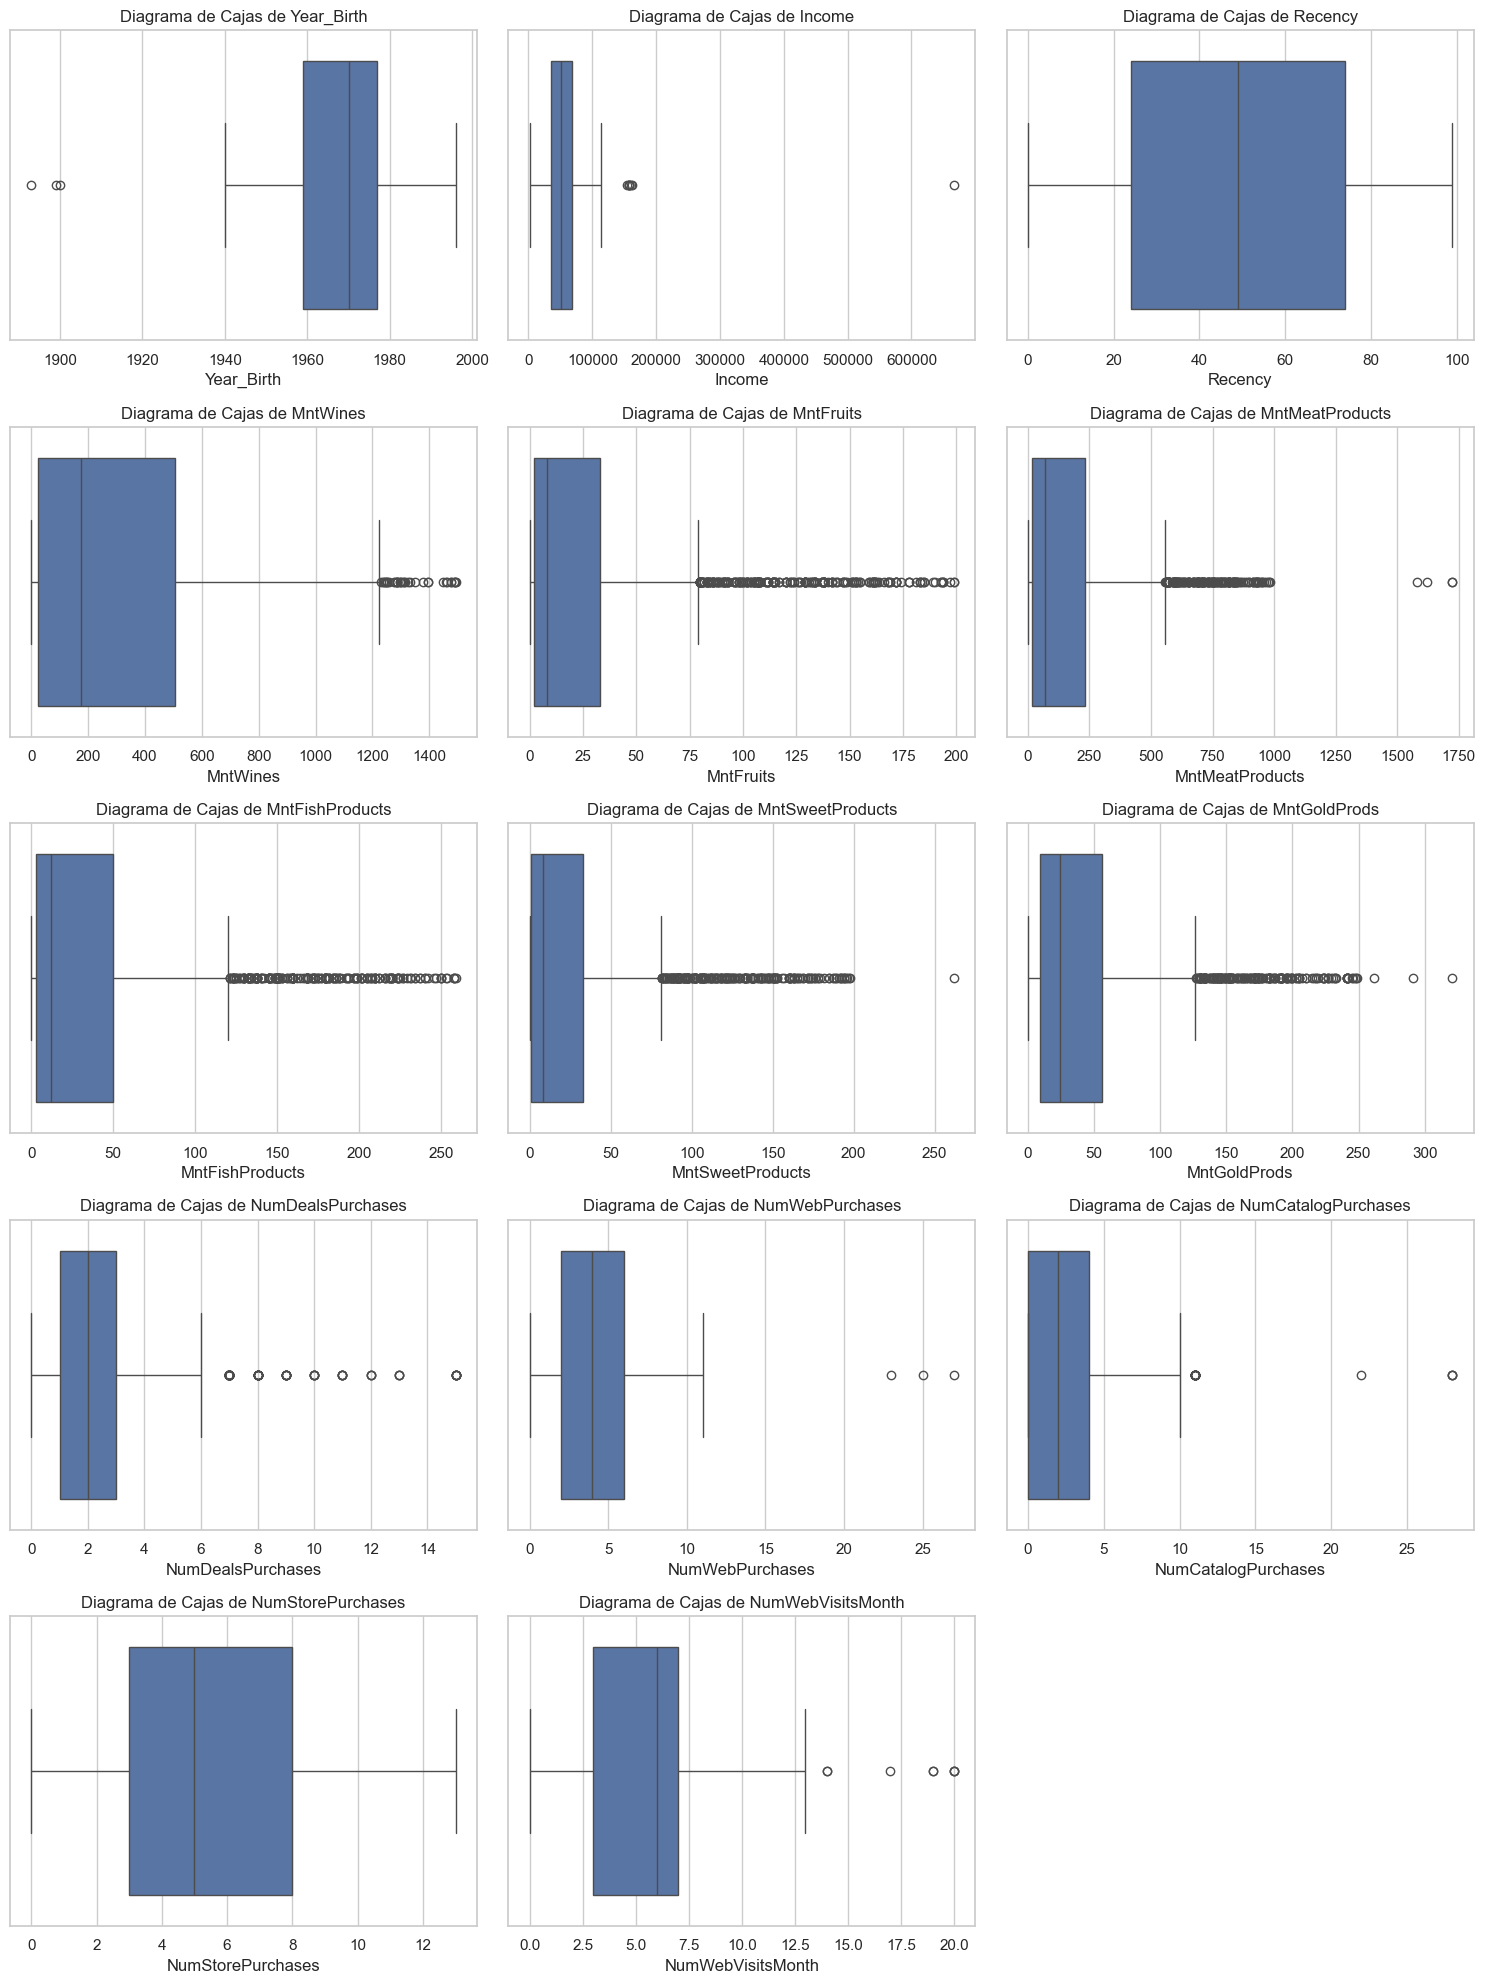

In [83]:
# Se elimina los outliers porque estos distorsionan las distancias, afectan el cálculo de la distancia euclidiana y 
# llevan a asignaciones incorrectas de puntos a clusters ademas de sesgar los centroides
numeric_cols = df.columns

sns.set(style="whitegrid")

num_cols = 3
num_rows = (len(numeric_cols) + num_cols - 1) // num_cols 

plt.figure(figsize=(15, num_rows * 4))  

for i, column in enumerate(numeric_cols, 1):
    plt.subplot(num_rows, num_cols, i)  
    sns.boxplot(data=df, x=column)  
    plt.title(f'Diagrama de Cajas de {column}')
    plt.xlabel(column)

plt.tight_layout()  
plt.show()

##### Eliminado outliers

In [84]:
def remove_outliers_iqr(data):
    numeric_cols = data.columns
    for column in numeric_cols:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

df_cleaned = remove_outliers_iqr(df)



##### Visualizando sin outliers

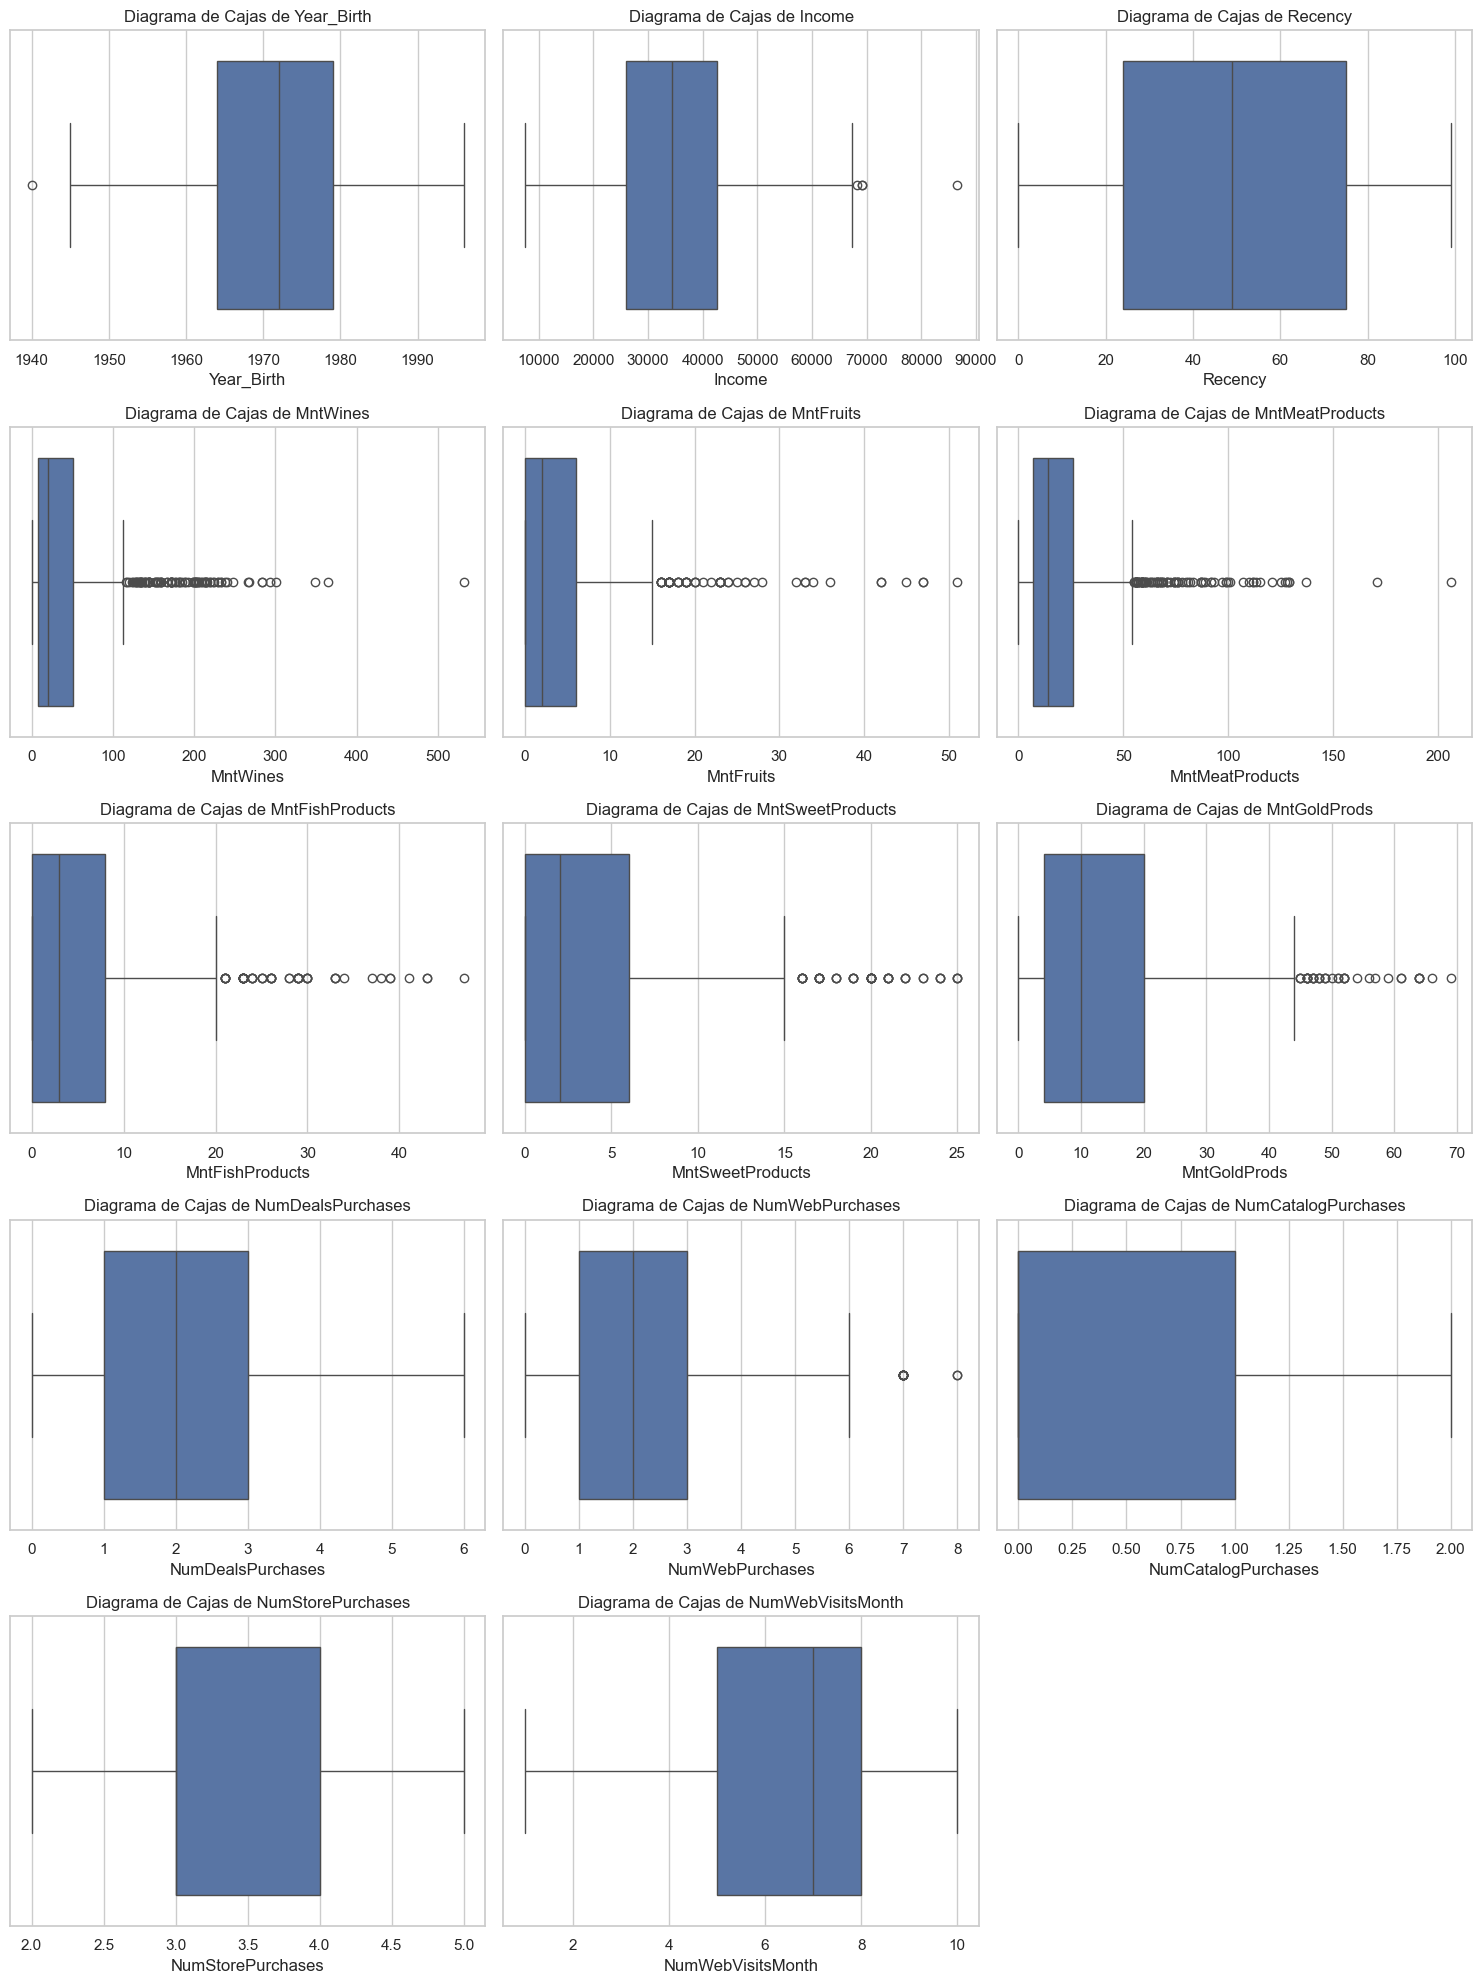

In [85]:
numeric_cols = df_cleaned.columns

sns.set(style="whitegrid")

num_cols = 3
num_rows = (len(numeric_cols) + num_cols - 1) // num_cols  

# Crear la figura
plt.figure(figsize=(15, num_rows * 4))  

for i, column in enumerate(numeric_cols, 1):
    plt.subplot(num_rows, num_cols, i)  
    sns.boxplot(data=df_cleaned, x=column)  
    plt.title(f'Diagrama de Cajas de {column}')
    plt.xlabel(column)

plt.tight_layout()  
plt.show()

##### Metodo del codo para determinar los K optimos

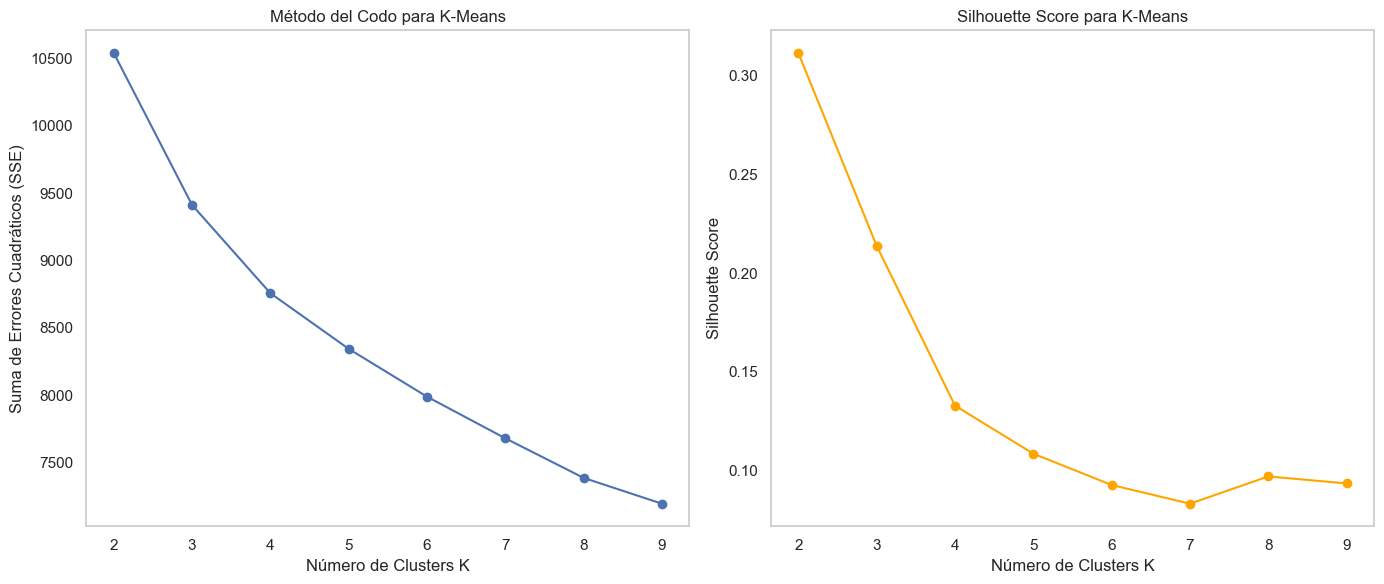

In [86]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)

k_values = range(2, 10)  
sse = []  
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, sse, marker='o')
plt.title('Método del Codo para K-Means')
plt.xlabel('Número de Clusters K')
plt.ylabel('Suma de Errores Cuadráticos (SSE)')
plt.xticks(k_values)
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score para K-Means')
plt.xlabel('Número de Clusters K')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid()

plt.tight_layout()
plt.show()

# Se logra determinar atraves del metodo del codo y silhouette score que el modelo alcanza su maximo rendimiento con k=3,luego
#para un k > 3 ese rendimiento cae.



##### Modelo K-means y visualizacion

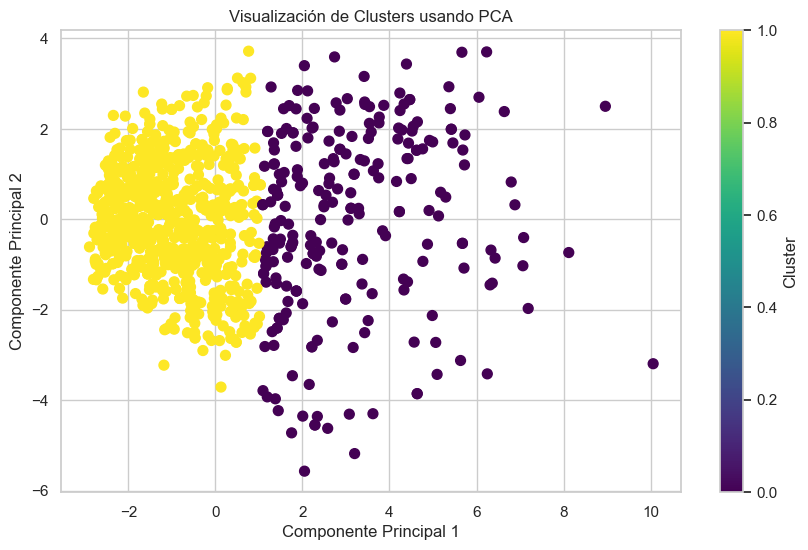

In [87]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_scaled)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', s=50)
plt.title('Visualización de Clusters usando PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()



#### Una vez elegido el K más adecuado. Describe las características principales de cada cluster 2pts

In [88]:

df_scaled['Cluster'] = kmeans.labels_

cluster_summary = df_scaled.groupby('Cluster').mean().reset_index()

print("Características principales de cada cluster:")
print(cluster_summary)



"""
Intepretacion

Cluster 0 representa un grupo de consumidores más jóvenes (Year_Birth) y con un ingreso superior (Income), 
que gasta mucho en productos alimenticios (MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, 
MntGoldProds) y de lujo, y que realiza muchas compras online (NumWebPurchases) y en tiendas (NumStorePurchases).

Cluster 1, en cambio, representa un grupo de consumidores más mayores (Year_Birth), con ingresos más bajos (Income) y 
menos actividad en términos de compras, tanto online (NumWebPurchases) como en tiendas físicas (NumStorePurchases).

"""


Características principales de cada cluster:
   Cluster  Year_Birth    Income   Recency  MntWines  MntFruits  \
0        0   -0.193518  0.649672  0.098692  1.133610   0.741061   
1        1    0.062748 -0.210657 -0.032001 -0.367574  -0.240290   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0         1.218369         0.603453          0.714904      0.984874   
1        -0.395057        -0.195670         -0.231808     -0.319346   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0           0.818289         1.195718             1.009734           0.982517   
1          -0.265331        -0.387712            -0.327407          -0.318582   

   NumWebVisitsMonth  
0           0.111863  
1          -0.036272  


'\nIntepretacion\n\nCluster 0 representa un grupo de consumidores más jóvenes (Year_Birth) y con un ingreso superior (Income), \nque gasta mucho en productos alimenticios (MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, \nMntGoldProds) y de lujo, y que realiza muchas compras online (NumWebPurchases) y en tiendas (NumStorePurchases).\n\nCluster 1, en cambio, representa un grupo de consumidores más mayores (Year_Birth), con ingresos más bajos (Income) y \nmenos actividad en términos de compras, tanto online (NumWebPurchases) como en tiendas físicas (NumStorePurchases).\n\n'